<a href="https://colab.research.google.com/github/Mohsinnmalik/CODSFOT-DATASCIENCE-PROJECT/blob/main/Sales_prediction_using_python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhanced Sales Prediction using Python


# Import necessary libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score



# Set a random seed for reproducibility

In [77]:
random_seed = 42
np.random.seed(random_seed)



# Load the sales dataset

In [78]:
sales_data = pd.read_csv('/content/archive (5).zip', encoding='ISO-8859-1')



# Display detailed information about the dataset

In [79]:
print("Dataset Information:")
print(f"Number of rows: {sales_data.shape[0]}")
print(f"Number of columns: {sales_data.shape[1]}")
print(f"Columns: {', '.join(sales_data.columns)}")

Dataset Information:
Number of rows: 500
Number of columns: 9
Columns: customer name, customer e-mail, country, gender, age, annual Salary, credit card debt, net worth, car purchase amount


# Display data types and non-null counts for each column

In [80]:
print("\nData Types and Non-null Counts:")
print(sales_data.info())


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None


# Display summary statistics for numerical columns

In [81]:
print("\nSummary Statistics:")
print(sales_data.describe())



Summary Statistics:
           gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000   

# Drop unnecessary columns

In [82]:
columns_to_drop = ['customer name', 'customer e-mail', 'country', 'gender']
sales_data.drop(columns=columns_to_drop, inplace=True)


# Display the first few rows of the modified dataset

In [83]:
print("\nModified Dataset:")
print(sales_data.head())



Modified Dataset:
         age  annual Salary  credit card debt    net worth  \
0  41.851720    62812.09301      11609.380910  238961.2505   
1  40.870623    66646.89292       9572.957136  530973.9078   
2  43.152897    53798.55112      11160.355060  638467.1773   
3  58.271369    79370.03798      14426.164850  548599.0524   
4  57.313749    59729.15130       5358.712177  560304.0671   

   car purchase amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248  


# Explore correlation between variables

In [84]:
correlation_matrix = sales_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                          age  annual Salary  credit card debt  net worth  \
age                  1.000000       0.000130          0.034721   0.020356   
annual Salary        0.000130       1.000000          0.049599   0.014767   
credit card debt     0.034721       0.049599          1.000000  -0.049378   
net worth            0.020356       0.014767         -0.049378   1.000000   
car purchase amount  0.632865       0.617862          0.028882   0.488580   

                     car purchase amount  
age                             0.632865  
annual Salary                   0.617862  
credit card debt                0.028882  
net worth                       0.488580  
car purchase amount             1.000000  


# Visualize data distribution using histograms

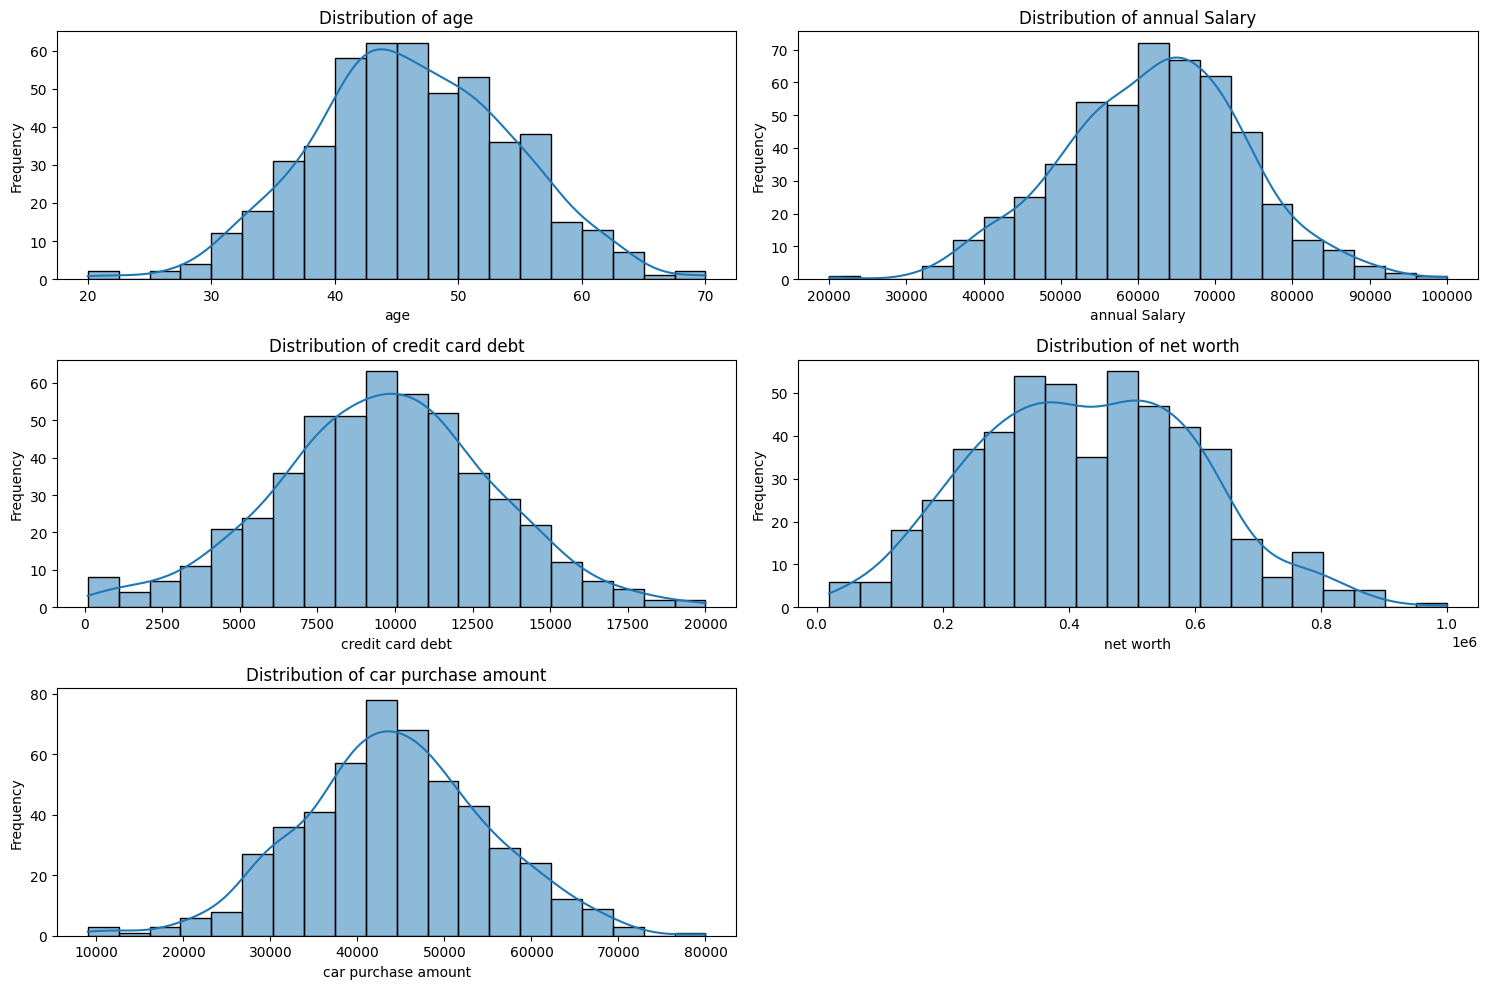

In [85]:
# Determine the number of rows and columns for subplots
num_columns = sales_data.shape[1]
num_rows = (num_columns + 1) // 2  # Ensure at least 1 row

# Create subplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(sales_data.columns, 1):
    plt.subplot(num_rows, 2, i)  # Use dynamic subplot grid
    sns.histplot(sales_data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Separate features and target variable

In [86]:
X = sales_data.iloc[:, :-1]
y = sales_data.iloc[:, -1]

# Normalize the features and target variable using Min-Max scaling

In [87]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1, shuffle=True, random_state=random_seed)


# Train a Linear Regression model

In [89]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

# Evaluate the Linear Regression model

In [90]:
linear_score_train = linear_model.score(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)


# Train a Lasso Regression model

In [91]:
lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.0001)

# Evaluate the Lasso Regression model

In [92]:
lasso_score_train = lasso_model.score(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)


# Train a Ridge Regression model

In [93]:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)


Ridge(alpha=0.001)

# Evaluate the Ridge Regression model

In [94]:
ridge_score_train = ridge_model.score(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Visualize the predictions of different models

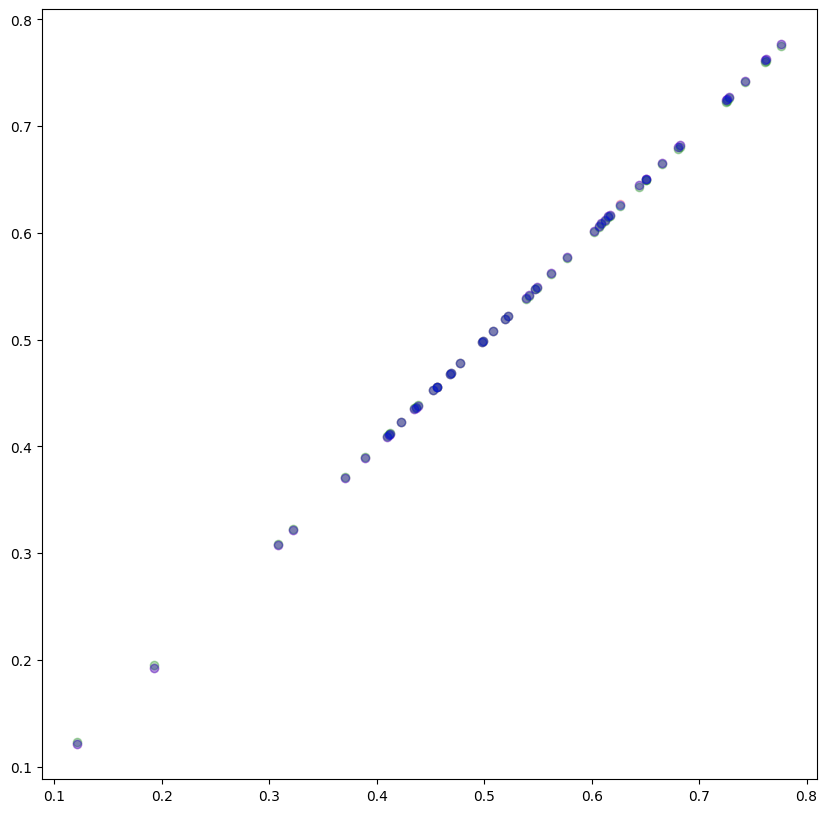

In [95]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, linear_pred, c='r', alpha=0.2, label='Linear Regression')
plt.scatter(y_test, lasso_pred, c='g', alpha=0.3, label='Lasso Regression')
plt.scatter(y_test, ridge_pred, c='b', alpha=0.3, label='Ridge Regression')


# Display the legend and show the plot

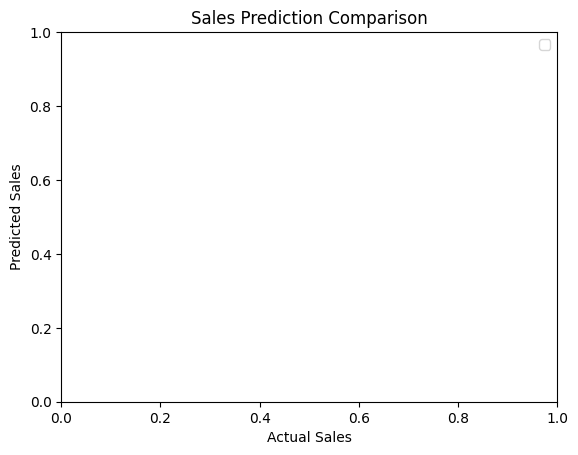

In [96]:
plt.legend()
plt.title('Sales Prediction Comparison')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# CREDITS

<ipython-input-97-8255c7c895d5>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


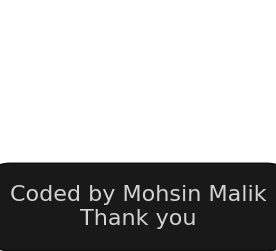

In [97]:

num_columns = sales_data.shape[1]
num_rows = (num_columns + 1) // 2


plt.figure(figsize=(2, 3))
for i, column in enumerate(sales_data.columns, 1):
    plt.subplot(num_rows, 2, i)
    plt.axis('off')


plt.text(0.5, 0.5, 'Coded by Mohsin Malik\nThank you',
         ha='center', va='center', color='lightgrey', fontsize=16,
         bbox=dict(facecolor='black', alpha=0.9, boxstyle='round', pad=1.0))

plt.tight_layout()
plt.show()
